In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import re

In [75]:
# import data
df1 = pd.read_csv("Education index.csv", skipinitialspace = True)
df2 = pd.read_csv("Foreign direct investment, net inflows (% of GDP).csv", skipinitialspace = True)
df3 = pd.read_csv("Gender Development Index (GDI).csv", skipinitialspace = True)
df4 = pd.read_csv("Gross capital formation (% of GDP).csv", skipinitialspace = True)
df5 = pd.read_csv("Gross national income (GNI) per capita (constant 2017 PPP$).csv", skipinitialspace = True)
df6 = pd.read_csv("Human Development Index (HDI).csv", skipinitialspace = True)
df7 = pd.read_csv("Labour force participation rate (% ages 15 and older).csv", skipinitialspace = True)
df8 = pd.read_csv("Life expectancy at birth (years).csv", skipinitialspace = True)
df9 = pd.read_csv("Total debt service (% of exports of goods, services and primary income).csv", skipinitialspace = True)
df10 = pd.read_csv("Total population (millions).csv", skipinitialspace = True)

### Data Preprocessing

In [76]:
df = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10]

In [77]:
# drop empty columns 
for i in df:
    i.dropna(axis=1, how='all', inplace=True)

In [78]:
# drop unnecessary rows
for i in df:
    i.drop(i.index[-17:], inplace=True)

In [79]:
# use data from 2010-2019
# drop unnecessary columns
for i in df:
    var_names = i.columns.tolist()
    i.drop(i.iloc[:,1:var_names.index('2010')], axis=1, inplace=True)

In [80]:
for i in range(len(df)):
    file_name = os.listdir() # files in dir
    file_name.remove('.DS_Store')
    file_name.remove('.ipynb_checkpoints')
    file_name.remove('Final Project.ipynb')
    file_name_noext = [j.replace(".csv", "") for j in file_name] # extract file names
    file_name_noext.sort()
    
    df[i] = df[i].melt(id_vars="Country", var_name="Year") # pivot table
    df[i] = df[i].rename(columns={'value': file_name_noext[i]}) # rename value column
    
    # sort data by country
    df[i].sort_values(['Country'], ascending=[True])

In [81]:
# replace non-integers with nan
for i in df:
    i.replace('..', np.nan, inplace=True)

In [82]:
# concatenate multiple dataframes
# data: final dataset to be used in the analysis
data = df[0].copy() 
for i in range(1, len(df)):
    data = pd.concat([data, df[i].iloc[:,2]], axis=1)

In [83]:
# replace random characters in dataset
data.iloc[:,-1] = data.iloc[:,-1].replace(r'[a-z]+', np.nan, regex=True)

In [84]:
# number of nan observations for each column
data.isna().sum()

Country                                                                    1815
Year                                                                       1815
Education index                                                            1822
Foreign direct investment, net inflows (% of GDP)                          1937
Gender Development Index (GDI)                                             2056
Gross capital formation (% of GDP)                                         2084
Gross national income (GNI) per capita (constant 2017 PPP$)                1785
Human Development Index (HDI)                                              1822
Labour force participation rate (% ages 15 and older)                      1905
Life expectancy at birth (years)                                           1795
Total debt service (% of exports of goods, services and primary income)    2709
Total population (millions)                                                1755
dtype: int64

In [85]:
# drop NaN rows after concateration
data.dropna(how='any', inplace=True)

In [86]:
# summary statistics
data.describe()

,Country,Year,Education index,"Foreign direct investment, net inflows (% of GDP)",Gender Development Index (GDI),Gross capital formation (% of GDP),Gross national income (GNI) per capita (constant 2017 PPP$),Human Development Index (HDI),Labour force participation rate (% ages 15 and older),Life expectancy at birth (years),"Total debt service (% of exports of goods, services and primary income)",Total population (millions)
count,462,462,462,462,462,462,462,462,462,462,462,462
unique,112,9,327,157,199,225,458,316,255,234,238,247
top,Lithuania,2010,0.777,2.0,0.973,23.2,1776,0.729,60.4,74.0,3.1,0.1
freq,5,108,6,16,11,8,2,5,8,6,9,21


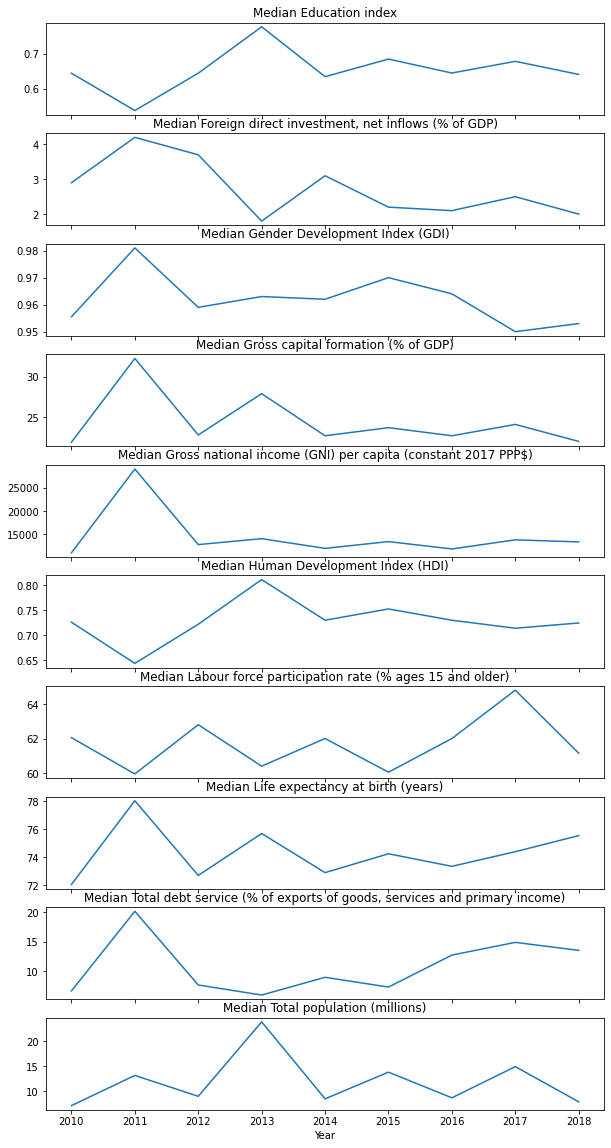

In [87]:
data['Year']=data['Year'].astype(int)
features = data.columns[2:] # independent vars
fig, axes = plt.subplots(10, 1, figsize=(10, 20), sharex=True)
j = 0
for i in features:
    data[i]=data[i].astype(float)
    data[i].groupby(data['Year']).median().plot(
        ax=axes[j], label=i, title="Median "+i)
    
    j += 1

In [88]:
# rename features (shortened)

temp = []
for i in data.columns:
    # splitting feature names by '(' to reduce their lengths
    temp.append(i.split(' ('))

compact_feature_names = []
for i in temp:
    compact_feature_names.append(i[0])

data.rename(columns=dict(zip(data.columns, compact_feature_names)), inplace=True)

In [89]:
data.columns

Index(['Country', 'Year', 'Education index',
       'Foreign direct investment, net inflows', 'Gender Development Index',
       'Gross capital formation', 'Gross national income',
       'Human Development Index', 'Labour force participation rate',
       'Life expectancy at birth', 'Total debt service', 'Total population'],
      dtype='object')

In [90]:
# correlation matrix
data.columns = compact_feature_names
corr = data.iloc[:,2:].corr()
corr

,Education index,"Foreign direct investment, net inflows",Gender Development Index,Gross capital formation,Gross national income,Human Development Index,Labour force participation rate,Life expectancy at birth,Total debt service,Total population
Education index,1.000000,-0.088565,0.197089,0.040918,0.127210,0.956860,-0.107524,0.228576,-0.003514,-0.038386
"Foreign direct investment, net inflows",-0.088565,1.000000,-0.008643,-0.062863,0.057587,-0.075430,0.099157,-0.090099,-0.034756,-0.029537
Gender Development Index,0.197089,-0.008643,1.000000,-0.004322,0.056954,0.206005,-0.052208,0.039552,-0.022871,-0.019127
Gross capital formation,0.040918,-0.062863,-0.004322,1.000000,-0.028905,0.030213,0.014189,0.095796,0.001619,-0.008947
Gross national income,0.127210,0.057587,0.056954,-0.028905,1.000000,0.155142,0.048648,0.511684,-0.015411,0.078390
Human Development Index,0.956860,-0.075430,0.206005,0.030213,0.155142,1.000000,-0.116854,0.232786,0.015661,-0.032192
Labour force participation rate,-0.107524,0.099157,-0.052208,0.014189,0.048648,-0.116854,1.000000,-0.148500,-0.062003,-0.016890
Life expectancy at birth,0.228576,-0.090099,0.039552,0.095796,0.511684,0.232786,-0.148500,1.000000,-0.046823,0.077497
Total debt service,-0.003514,-0.034756,-0.022871,0.001619,-0.015411,0.015661,-0.062003,-0.046823,1.000000,-0.013814
Total population,-0.038386,-0.029537,-0.019127,-0.008947,0.078390,-0.032192,-0.016890,0.077497,-0.013814,1.000000


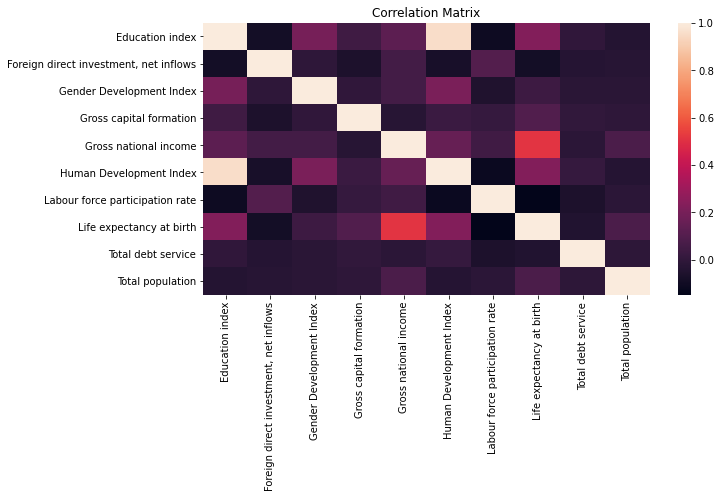

In [91]:
# correlation heat map
ax = plt.axes()
sns.heatmap(corr, ax = ax)
ax.set_title('Correlation Matrix')
plt.show()

In [92]:
corr_copy = corr # mape copy of correlation dataframe
corr_copy['feature'] = corr_copy.index # feature names
corr_copy['feature']

Education index                                                  Education index
Foreign direct investment, net inflows    Foreign direct investment, net inflows
Gender Development Index                                Gender Development Index
Gross capital formation                                  Gross capital formation
Gross national income                                      Gross national income
Human Development Index                                  Human Development Index
Labour force participation rate                  Labour force participation rate
Life expectancy at birth                                Life expectancy at birth
Total debt service                                            Total debt service
Total population                                                Total population
Name: feature, dtype: object

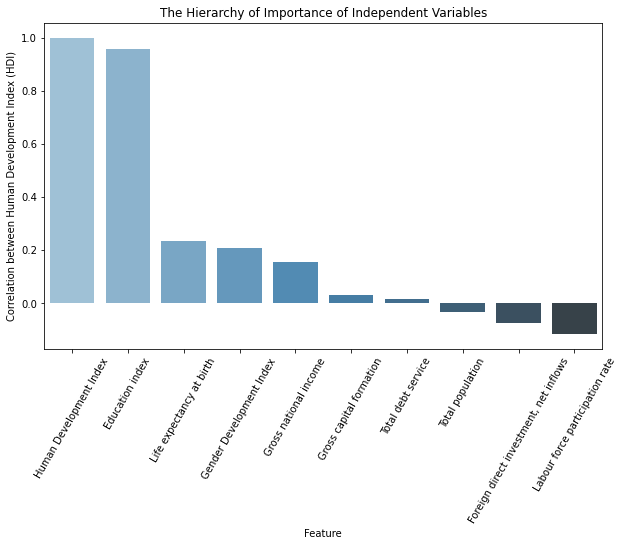

In [93]:
plt.figure(figsize=(10,6))
# barplot
sns.barplot(x='feature', y="Human Development Index", data=corr_copy, 
            order=corr_copy.sort_values('Human Development Index', 
            ascending = False).feature, palette="Blues_d")

plt.xlabel("Feature")
plt.ylabel("Correlation between Human Development Index (HDI)")
plt.title("The Hierarchy of Importance of Independent Variables")
#plt.tight_layout()
plt.xticks(rotation=60)
plt.show()

### Model: Linear Regression
#### Linear Regression analysis is a statistical technique for determining the relationship between a dependent variable and one or more independent variables. The analysis yields a predicted value for the criterion resulting from a linear combination of the predictors.

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix ,classification_report
from sklearn import preprocessing

In [95]:
# split train_data into training and testing sets
np.random.seed(42) # fixed random data every time we run the code
X = data.drop(['Country', 'Year', 'Human Development Index'], axis = 1) # independent var
y = data['Human Development Index'] # dependent var
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [96]:
X_train

,Education index,"Foreign direct investment, net inflows",Gender Development Index,Gross capital formation,Gross national income,Labour force participation rate,Life expectancy at birth,Total debt service,Total population
8,0.919,-5.6,0.947,18.1,43580.0,63.8,81.9,5.9,22.2
1572,0.812,13.1,0.964,23.0,37294.0,62.3,79.2,14.6,1.3
193,0.423,0.3,0.992,38.1,10793.0,42.5,75.2,15.7,13.6
805,0.641,9.1,1.019,13.3,23180.0,63.2,77.7,4.3,7.3
1587,0.819,1.1,0.969,28.1,48360.0,59.2,81.7,13.1,9.8
...,...,...,...,...,...,...,...,...,...
117,0.373,2.6,0.716,17.6,998.0,79.6,74.4,1.9,0.6
840,0.681,2.7,0.914,22.2,46504.0,43.9,82.4,22.1,63.6
1205,0.600,3.3,0.865,30.2,46396.0,59.1,81.4,12.7,1391.9
1592,0.554,1.4,0.926,38.6,55155.0,62.3,81.2,8.3,4.5


In [97]:
# standardize data
scale = preprocessing.StandardScaler()
scaled_X_train = scale.fit_transform(X_train) 
scaled_X_test = scale.fit_transform(X_test) 

In [98]:
# Train model
linreg = LinearRegression().fit(scaled_X_train, y_train)
r_sq = linreg.score(scaled_X_train, y_train)
print('coefficient of determination R Squared:', round(r_sq, 4))
print('Intercept:', linreg.intercept_)
print('Coefficients:\n')
for i, j in zip(compact_feature_names[2:], linreg.coef_):
    print(f'{i}: {j}')

coefficient of determination R Squared: 0.9202
Intercept: 0.7050897832817338
Coefficients:

Education index: 0.1510339407409121
Foreign direct investment, net inflows: 0.002720637470007974
Gender Development Index: 0.002036795085202267
Gross capital formation: 0.0015285350185514192
Gross national income: 0.0050781738303808015
Human Development Index: -0.0026947563023628916
Labour force participation rate: 0.0012248023143463065
Life expectancy at birth: 0.0032803402200835457
Total debt service: -0.0006427858126153533


In [99]:
y_pred_train = linreg.predict(scaled_X_train) # TRAIN: predicted values
y_pred_test = linreg.predict(scaled_X_test) # Test: predicted values

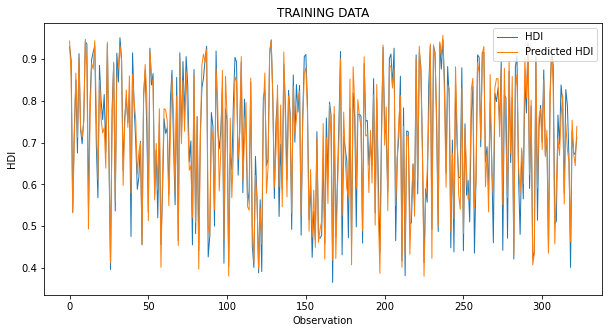

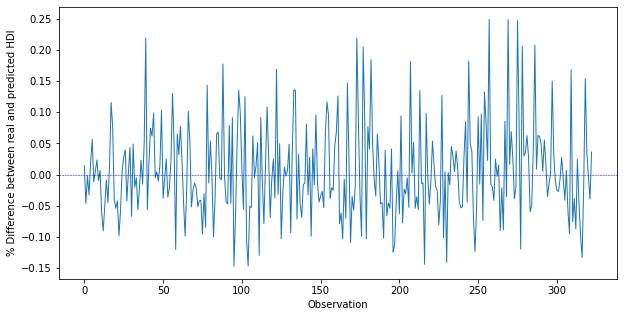

In [100]:
fig, ax = plt.subplots(figsize=[10, 5])

ax.plot(range(len(y_train)), y_train, linewidth=1, label='HDI')
ax.plot(range(len(y_train)), y_pred_train, linewidth=1, label='Predicted HDI')

ax.set_xlabel('Observation')
ax.set_ylabel('HDI')
plt.title("TRAINING DATA")
plt.legend(loc='upper right')
plt.show()

plt.rcParams["figure.figsize"] = (10,5)
plt.plot(range(len(y_train)), (y_pred_train-y_train)/y_train, linewidth=1)
plt.axhline(y=0, color='b', linewidth=.5, linestyle='--')
plt.xlabel('Observation')
plt.ylabel('% Difference between real and predicted HDI')
plt.show()

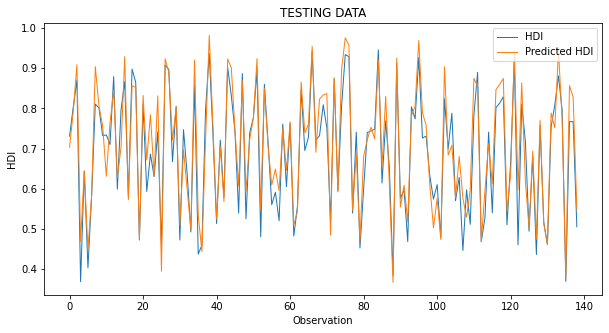

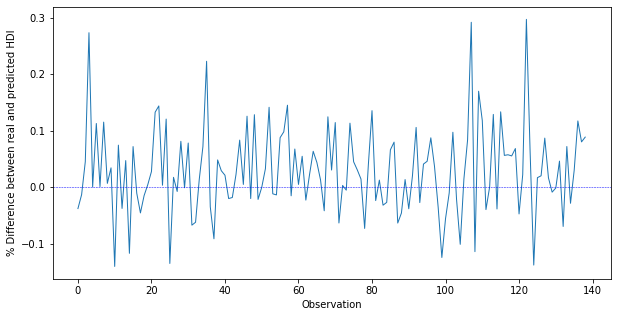

In [101]:
fig, ax = plt.subplots(figsize=[10, 5])

ax.plot(range(len(y_test)), y_test, linewidth=1, label='HDI')
ax.plot(range(len(y_test)), y_pred_test, linewidth=1, label='Predicted HDI')

ax.set_xlabel('Observation')
ax.set_ylabel('HDI')
plt.title("TESTING DATA")
plt.legend(loc='upper right')
plt.show()

plt.rcParams["figure.figsize"] = (10,5)
plt.plot(range(len(y_test)), (y_pred_test-y_test)/y_test, linewidth=1)
plt.axhline(y=0, color='b', linewidth=.5, linestyle='--')
plt.xlabel('Observation')
plt.ylabel('% Difference between real and predicted HDI')
plt.show()

### Model: Logistic Regression for Binary Classification
#### Logistic regression model is a supervised ML algorithm used for solving binary classification problems.
#### In order to perform the logistic regressionanalysis, we convert HDI into a binary variable with a threshold of 0.5. So, values greater than .7 will be assigned with 1 and values less than .7 will be assigned with 0.  

In [102]:
# convert HDI into a binary variable with values of 0 and 1
y_binary = np.where(y>.7, 1, 0)

In [103]:
# count values of 1 and 0 in HDI
unique, counts = np.unique(y_binary, return_counts=True)
dict(zip(unique, counts))

{0: 202, 1: 260}

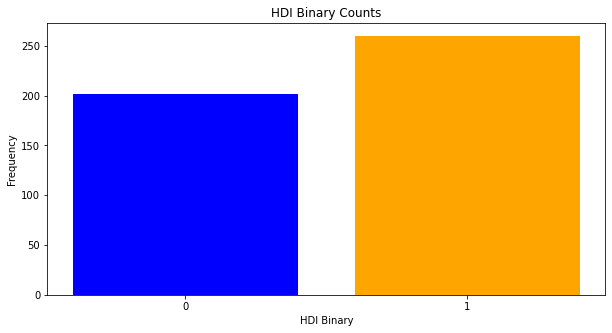

In [104]:
plt.bar(unique, height=counts, color=['blue', 'orange'])
plt.ylabel('Frequency')
plt.xlabel('HDI Binary')
plt.title('HDI Binary Counts')
plt.xticks(unique)
plt.show()

In [105]:
# split train and test sets
np.random.seed(42) # fixed random data every time we run the code
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=.3, random_state=42)

# standardize data
scale = preprocessing.StandardScaler()
scaled_X_train = scale.fit_transform(X_train) 
scaled_X_test = scale.fit_transform(X_test) 

In [106]:
# Train model
# default solver: 'lbfgs'
# increase iteration to 1000 to resolve non-convergence issue
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg.fit(scaled_X_train, y_train)

LogisticRegression(max_iter=1000)

In [107]:
# Training accuracy
predicted_train = logreg.predict(scaled_X_train)
predicted_train_prob = logreg.predict_proba(scaled_X_train)[:,1]

train_acc = accuracy_score(y_train, predicted_train)*100

print('Confusion matrix:\n', confusion_matrix(y_train, predicted_train))
print('Training accuracy: %.4f %%' % train_acc) 

Confusion matrix:
 [[130   9]
 [  6 178]]
Training accuracy: 95.3560 %


In [108]:
# Test model
# Testing accuracy

## predicted values
predicted_test = logreg.predict(scaled_X_test)
## the probabilities for the target (0 and 1 in your case) in array form
predicted_test_prob = logreg.predict_proba(scaled_X_test)[:,1]

test_acc = accuracy_score(y_test, predicted_test)*100

print('Confusion matrix:\n', confusion_matrix(y_test, predicted_test))
print('Testing accuracy: %.4f %%' % test_acc) 

Confusion matrix:
 [[58  5]
 [ 3 73]]
Testing accuracy: 94.2446 %


In [109]:
# classification metrics for testing results
print(classification_report(y_test, predicted_test, digits=5))

              precision    recall  f1-score   support

           0    0.95082   0.92063   0.93548        63
           1    0.93590   0.96053   0.94805        76

    accuracy                        0.94245       139
   macro avg    0.94336   0.94058   0.94177       139
weighted avg    0.94266   0.94245   0.94236       139



### Random Forest Regression for Binary Classification
#### Random forest is a supervised learning algorithm which uses ensemble learning method for classification and regression. It operates by constructing a multitude of decision trees at training and outputting the class that is the mode of the classes of the individual trees.

In [110]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100, max_depth=3)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(scaled_X_train, y_train)

RandomForestClassifier(max_depth=3)

In [111]:
# Training accuracy
predicted_train = clf.predict(scaled_X_train)
predicted_train_prob = clf.predict_proba(scaled_X_train)[:,1]

train_acc = accuracy_score(y_train, predicted_train)*100

print('Training accuracy: %.4f %%' % train_acc) 

Training accuracy: 96.9040 %


In [112]:
# Test model
# Testing accuracy

## predicted values
predicted_test = logreg.predict(scaled_X_test)
## the probabilities for the target (0 and 1 in your case) in array form
predicted_test_prob = logreg.predict_proba(scaled_X_test)[:,1]

test_acc = accuracy_score(y_test, predicted_test)*100
print('Testing accuracy: %.4f %%' % test_acc) 

Testing accuracy: 94.2446 %


In [113]:
# classification metrics for testing results
print(classification_report(y_test, predicted_test, digits=5))

              precision    recall  f1-score   support

           0    0.95082   0.92063   0.93548        63
           1    0.93590   0.96053   0.94805        76

    accuracy                        0.94245       139
   macro avg    0.94336   0.94058   0.94177       139
weighted avg    0.94266   0.94245   0.94236       139



#### $\rightarrow$ Overfitting Issue: This issue occured when the training accuracy exceeds the testing accuracy by large. We assume that the current model overfits due to a small sample size and a large number of features relatively to the sample size. With the reduction in the maximum depth of the tree, we were able to reduce overfitting by approximately 3 percent. 